# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
print("Start import software module")
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
import sklearn
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.contrib.layers import flatten
%matplotlib inline
print("Import software module Done")
import matplotlib.image as mpimg

Start import software module
Import software module Done


In [2]:
# Load pickled data
print("Start data loading")
# TODO: fill this in based on where you saved the training and testing data
# need to revise on OSU OSC
training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
test_features, test_labels = test['features'], test['labels']

del train, test
print("Data loading done")

Start data loading
Data loading done


In [3]:
### To start off let's do a basic data summary.
print("Start data summary")
# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(test_features)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = y_train[n_train -1 ] +1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Data summary done")

Start data summary
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Data summary done


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

Start data exploration
                                     Random show of 100 training datasets images


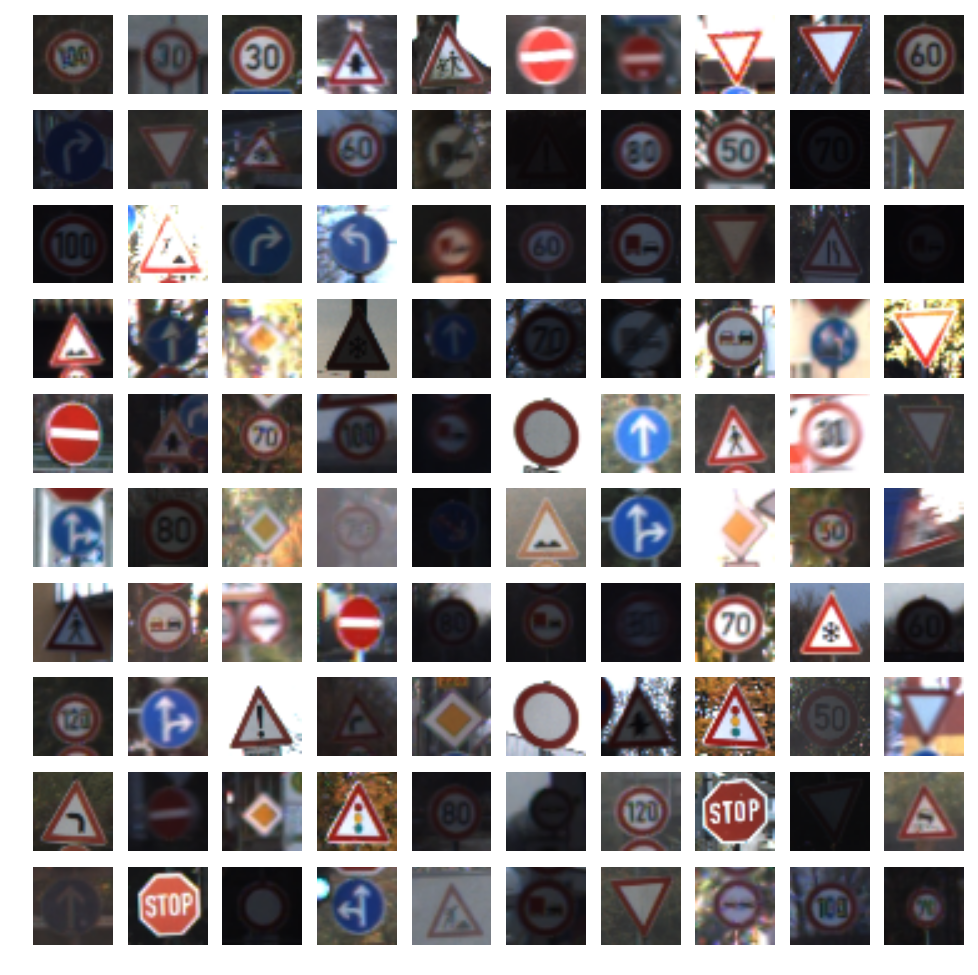

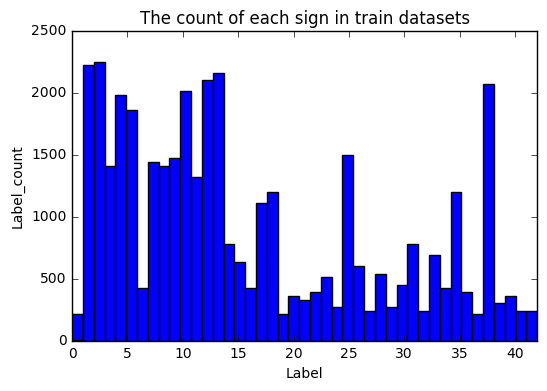

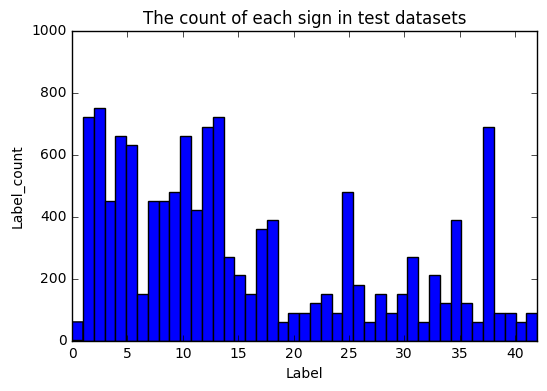

Data exploration done


In [17]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
print('Start data exploration')
print('                                     Random show of 100 training datasets images')
#randomly pick and sign and plot
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = X_train[random.randint(0, len(X_train))]

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

#plotting the count of each sign in train datasets and test datasets
plt.figure(2)
plt.xlabel('Label')
plt.ylabel('Label_count')
plt.axis([0, 42, 0, 2500])
plt.title('The count of each sign in train datasets')
plt.hist(y_train, n_classes)

plt.figure(3)
plt.xlabel('Label')
plt.ylabel('Label_count')
plt.axis([0, 42, 0, 1000])
plt.title('The count of each sign in test datasets')
plt.hist(test_labels, n_classes)
plt.show()

print('Data exploration done')    

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Start preprocess


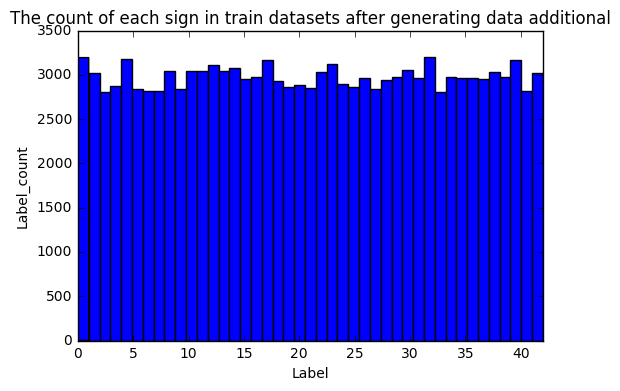

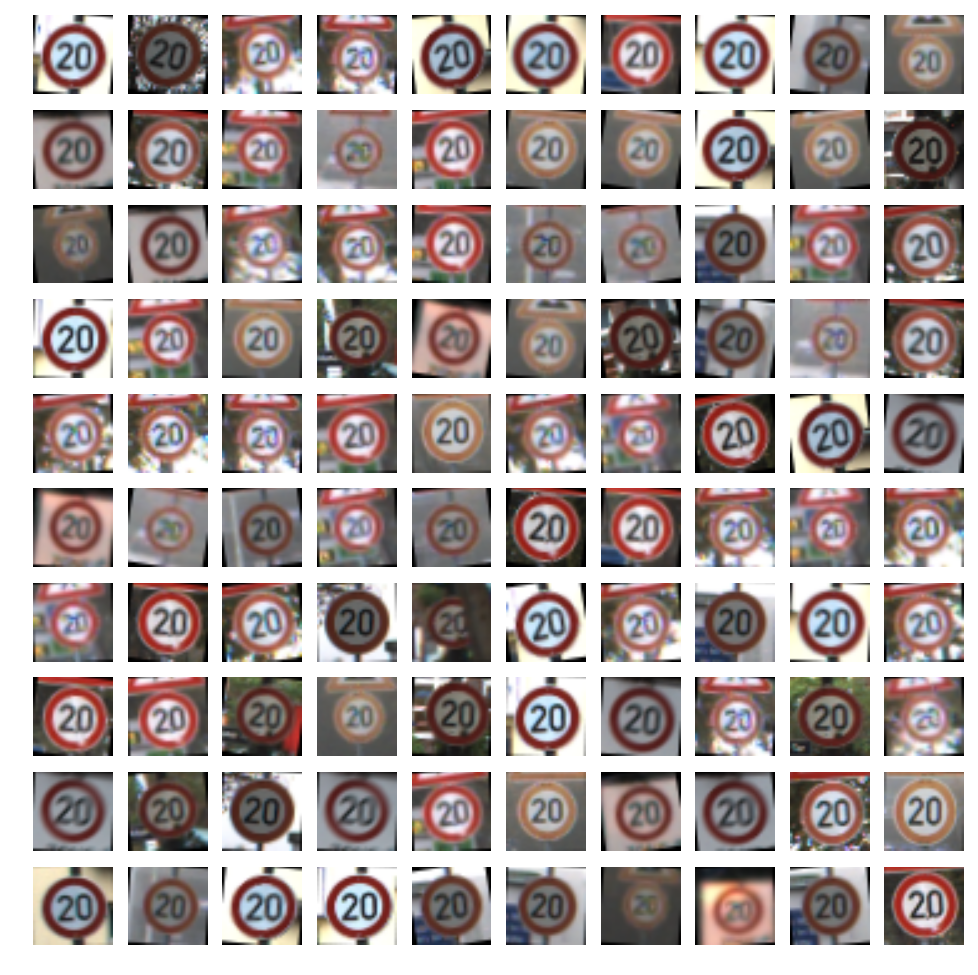

preprocess done


In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.

print("Start preprocess")
#define a min-max scaling function used to normalize the image data
def normalize_inputimage(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    greyscale_min = 0
    greyscale_max = 255
    return a + ( ( (image_data - greyscale_min)*(b - a) )/( greyscale_max - greyscale_min ) )

def transform_image(img,ang_range):
    '''
    1- Image
    2- ang_range: Range of angles for rotation   
    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))

    return img

#generate new training data to make the data balance
inputs_per_class = np.bincount(y_train)
# each class will have 2800-3200 training examples 
for i in range(len(inputs_per_class)):
    add_number = 3000 + random.randint(-200, 200) - inputs_per_class[i]
    
    new_features = []
    new_labels = []
    mask = np.where(y_train == i)
    features = X_train[mask]
    for j in range(add_number):
        index = random.randint(0, inputs_per_class[i] - 1)
        new_features.append(transform_image(features[index],20))
        new_labels.append(i)
    X_train = np.append(X_train, new_features, axis=0)
    y_train = np.append(y_train, new_labels, axis=0)
del new_features, new_labels

#plot the count of each sign in train datasets after generating data additiona    
plt.figure(4)
plt.xlabel('Label')
plt.ylabel('Label_count')
plt.axis([0, 42, 0, 3500])
plt.title('The count of each sign in train datasets after generating data additional')
plt.hist(y_train, n_classes)

mask = np.where(y_train == 0)
features = X_train[mask]
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = features[random.randint(0, 2800)]

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

#Normorlization, scale the image data from [0 255] to [0.1 0.9]
X_train = normalize_inputimage(X_train)
test_features = normalize_inputimage(test_features)

# randomly split the original training data into training and validation
train_features, validation_features, train_labels, validation_labels = train_test_split(
   X_train,
   y_train,
   test_size=0.2,
   random_state=36452
)

# One-hot encoded training and validation labels
oh_train_labels = tf.one_hot(train_labels, n_classes).eval(session=tf.Session())
oh_validation_labels = tf.one_hot(validation_labels, n_classes).eval(session=tf.Session())

print('preprocess done')


### Question 1 

_Describe the techniques used to preprocess the data._


**Answer:**
I  use two  preprocessing step in my implementation:

1/  Generate additional dataset by rotating the original image with some angles using Opencv to make the training datasets balance for each classes, i.e., each class have roughly the same number of training images. 
The reason we do this  is to train a model(weigh and bias) that can represent all the 43 classes. For example, if the number of the image of stop sign is much larger than that of 30KM speed limit sign, we will get a model that can better recognize stop sign than 30KM speed limit sign after training.

2/ Normalize the image  pixel value from [0,255] to [0.1,0.9], such tha the variance of the input images is small and all the input are put on the same scale, which make if much easier for the optimizer  to  optimize the cost function.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_


**Answer:**
I split the original tainning dataset in to traing(80%) and validation(20%) part using the  train_test_split function of sklearn. The original test data will keep as the test datasets. I will test my  network using validation data  for each epoch, and only test on testing dataset  when I am satisfied with my model and network.

I generate additional dataset to make the training datasets balance, as I exaplianed in question 1. In this way, the number of  training sets for each label is approxmately the same .

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Parameters
batch_size = 128
training_epochs = 40
#number of classes in the German traffic sign datasets
n_classes = 43  

def Traffic_LeNet(x,keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    #drop out
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 5: Fully Connected. Input = 120. Output = 43.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My architecture is the modified LeNet, there is two convolutional layers and two fully-connected layers, here is the specific deatils:

1/ Convolution layer 1. Iuput shape (32,32,3), filter shape(5,5,3,6),stride 1 and 'VALID' padding, and output shape 28x28x6.

2/ Activation layer 1 with rectified activation function.

3/ Maximum pooling layer 1 with 2x2 kernel, stride 2 and 'VALID' padding, output shape 14x14x6.

4/ Convolution layer 2. Iuput shape (14,14,6), filter shape(5,5,3,16),stride 1 and 'VALID' padding, and output shape 10x10x16.

5/ Activation layer 2 with rectified activation function.

6/ Dropout layer with  0.5 dropout rate.

7/ Maximum pooling layer 2 with 2x2 kernel, stride 2 and 'VALID' padding, output shape 5x5x16.

8/ Flatten layer. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.,output 400

9/ Fully connected layer 1. This should have 120 outputs.

10/ Activation layer 3 with rectified activation function.

11/ Fully connected layer 2. This should have 43 outputs.

The difference between my architecture and LeNet is that: 
1/ I add a dropout layer after the second activation layer, in order to avoid overfitting.
2/ I only use 2 fully connected layer instead of 3.



In [6]:
### Train your model here.
### Feel free to use as many code cells as needed.

#Prepare to train the model
# tf Graph input
keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder("float32", [None, 32, 32, 3])
y = tf.placeholder("float32", [None, n_classes])

logits = Traffic_LeNet(x,keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.AdamOptimizer().minimize(cost)


# Initializing the variables
init = tf.global_variables_initializer()
saver = tf.train.Saver() 
number_train = len(oh_train_labels)

In [ ]:
# Launch the graph and train the model
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(number_train/batch_size)
        # Loop over all batches
        for i in range(total_batch):        
            #randomly seletcly batch_zise train data
            indices = np.random.random_integers(0, number_train-1, batch_size)
            batch_x, batch_y = train_features[indices], oh_train_labels[indices]
            
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        # Display logs per epoch step
        c = sess.run(cost, feed_dict={x: batch_x, y: , keep_prob: 1.0})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
    print("Optimization Finished!")
    save_path = saver.save(sess, "./model/model.ckpt")
    print("Model saved in file: %s" % save_path)

    # Test model, compare if predicted class equals the true class of each image
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float32"))
    print(
        "Accuracy:",
        accuracy.eval({x: validation_features, y: oh_validation_labels, keep_prob: 1.0}))

**This is the trainin output trained from the cluster with Tesla K40 GPU**
Epoch: 0001 validation cost= 0.411966830
Epoch: 0002 validation cost= 0.187494069
Epoch: 0003 validation cost= 0.109417371
Epoch: 0004 validation cost= 0.082803875
Epoch: 0005 validation cost= 0.075698338
Epoch: 0006 validation cost= 0.061342090
Epoch: 0007 validation cost= 0.062645808
Epoch: 0008 validation cost= 0.036711000
Epoch: 0009 validation cost= 0.024241619
Epoch: 0010 validation cost= 0.018747220
Epoch: 0011 validation cost= 0.044600982
Epoch: 0012 validation cost= 0.030717906
Epoch: 0013 validation cost= 0.024882622
Epoch: 0014 validation cost= 0.005516934
Epoch: 0015 validation cost= 0.020161157
Epoch: 0016 validation cost= 0.017254464
Epoch: 0017 validation cost= 0.009594860
Epoch: 0018 validation cost= 0.027033908
Epoch: 0019 validation cost= 0.006072764
Epoch: 0020 validation cost= 0.003773408
Epoch: 0021 validation cost= 0.004319935
Epoch: 0022 validation cost= 0.011939825
Epoch: 0023 validation cost= 0.001585339
Epoch: 0024 validation cost= 0.007351744
Epoch: 0025 validation cost= 0.005931082
Epoch: 0026 validation cost= 0.005460749
Epoch: 0027 validation cost= 0.002444920
Epoch: 0028 validation cost= 0.015078365
Epoch: 0029 validation cost= 0.005151827
Epoch: 0030 validation cost= 0.010496388
Epoch: 0031 validation cost= 0.005422079
Epoch: 0032 validation cost= 0.005462926
Epoch: 0033 validation cost= 0.001587018
Epoch: 0034 validation cost= 0.001891505
Epoch: 0035 validation cost= 0.005783748
Epoch: 0036 validation cost= 0.002957565
Epoch: 0037 validation cost= 0.002279147
Epoch: 0038 validation cost= 0.005734891
Epoch: 0039 validation cost= 0.000742156
Epoch: 0040 validation cost= 0.004938717
Optimization Finished!
Model saved in file: ./model/model.ckpt
validation Accuracy: 0.997945

In [7]:
# launch the model being train on a cluster, and test if we save it correctly.
sess = tf.Session()
sess.run(init)
#saver = tf.train.Saver()
# Restore variables from disk.
saver.restore(sess, "./model/model.ckpt")
print("Model restored.")
# Calculate the accuracy on validation data
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float32"))
print(
    "Validation Accuracy:",
    sess.run(accuracy, feed_dict={x: validation_features, y: oh_validation_labels, keep_prob: 1.0}))

Model restored.
Validation Accuracy: 0.999023


In [18]:
# test on testing datasets after we are happy with the validation accuracy
# Calculate the accuracy on validation data
oh_test_labels = tf.one_hot(test_labels, n_classes).eval(session=tf.Session())
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float32"))
print(
    "Test Accuracy:",
    sess.run(accuracy, feed_dict={x: test_features, y: oh_test_labels, keep_prob: 1.0}))

Test Accuracy: 0.940538


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I trained my architectures Adam Optimizer with a learning rate of 0.001, a batch size of 128 and 40 training epochs.
The test time on Tesla K40 GPU is  5 minutes.

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**
First of all, I decide to use CNN because our task is to deal with images and CNN has the property of translation invariance in space.
So I start from LeNet , but add a dropout layer as it is the simplist way to avoid overfitting. I keeped the original activation layer and polling layers  as they are the commom technique in  image cladssification task. I also reduced the fully connected layers from 3 to 2, because we have 43 classed in our problems and 120 output after the first fully connected layers, which is reasonable to add only one fully connected layer at this point.
I tried different batch size (128,256,512) and it turned out batch size 128 can produce the best results.And after 40 epoches, I got a validation accuracy of  99.90%, so 40 epoches is enough.
I also tried  reduce a CNN layers  and other architetures, it turns out that with this architectures I can get the highest validation accuracy.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

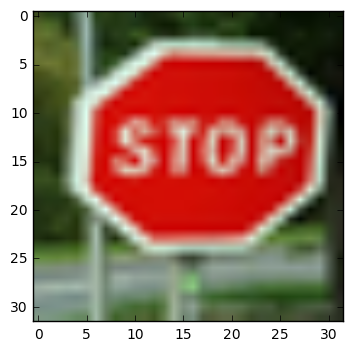

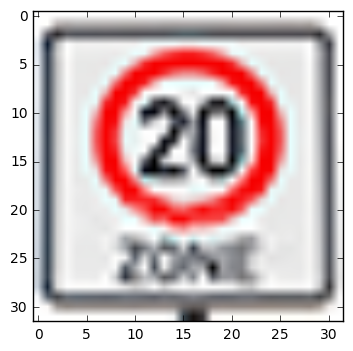

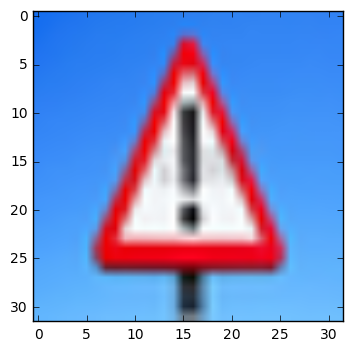

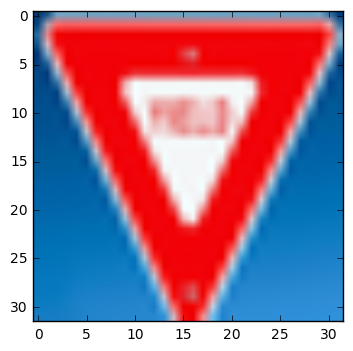

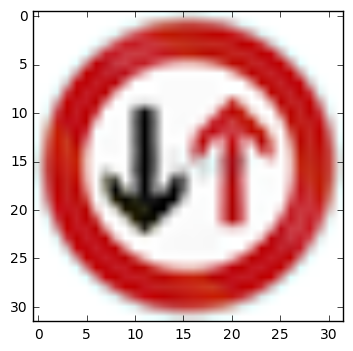

In [52]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
imgs = ['stopsign.png', '20km_speed_limit.png', 'general_caution.png','yield.png', 'priority.png']

mytest_img = []

for imgname in imgs:
    image = mpimg.imread('test_images/' + imgname)
    mytest_img.append(image)
    plt.imshow(image)
    plt.show()


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

I got very good accuracy for the first four images, but got wrong classification on the fifith image. The possible reason for the wrong classification is the quality of the image, or the general look is very different from the images in the training sets. 

I searched the internet and chose the above 5 images, and then resize them to [32 32 3] before put them in our model. In my case, the quality of the fifth images  is  much worse, resulting the wrong classification.


In [53]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
prediction = tf.nn.softmax(logits)
my_prediction = sess.run(prediction, feed_dict={x: mytest_img, keep_prob: 1.0})

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset?_


**Answer:**
4 out of 5 captured images are classified right using  our trained model, so the accuracy is 80%, which is lower than the test accuracy (~94%) on the test datasets.

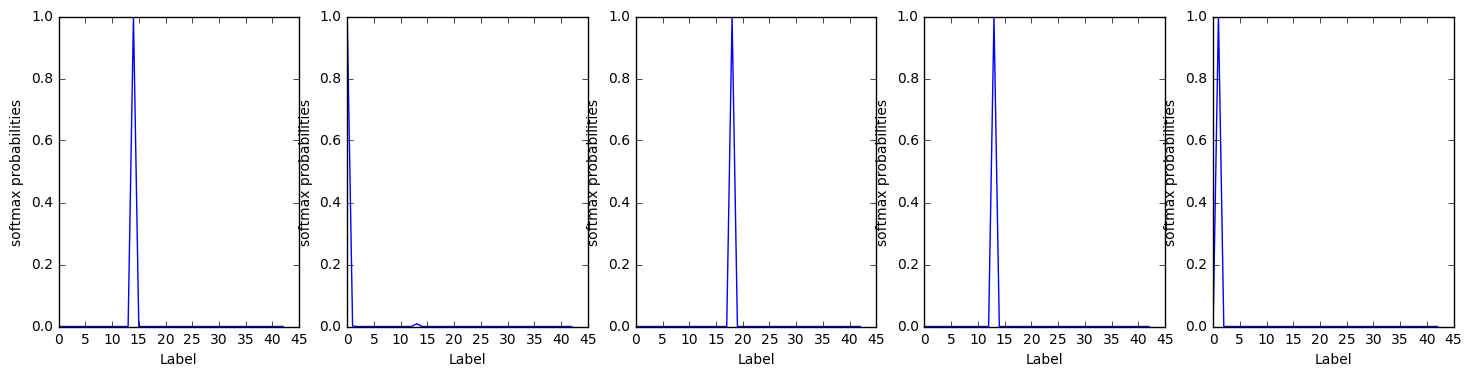

In [74]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
#print(my_prediction)
class_n = []
for x in range(43):
    class_n.append(x)
    
plt.figure(7,figsize=(18, 4))
#for i in range(len(my_prediction)):

plt.subplot(151)
plt.plot(class_n, my_prediction[0])
plt.xlabel('Label')
plt.ylabel('softmax probabilities')

plt.subplot(152)
plt.plot(class_n, my_prediction[1])
plt.xlabel('Label')
plt.ylabel('softmax probabilities')

plt.subplot(153)
plt.plot(class_n, my_prediction[2])
plt.xlabel('Label')
plt.ylabel('softmax probabilities')

plt.subplot(154)
plt.plot(class_n, my_prediction[3])
plt.xlabel('Label')
plt.ylabel('softmax probabilities')

plt.subplot(155)
plt.plot(class_n, my_prediction[4])
plt.xlabel('Label')
plt.ylabel('softmax probabilities')

plt.show()


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**
From the above softmax probabilities plots and the folowing analysis,we can see  that the model is very certain (almost 100%) of its prediction, even though the fifth prediction is wrong. 

In [55]:
#open and read signnames.csv
import csv
k = 5
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    signnames = dict((rows[0],rows[1]) for rows in reader)
values, indices = sess.run(tf.nn.top_k(prediction, k), feed_dict={x: mytest_img, keep_prob: 1.0})
for i in range(len(values)):
    print()
    print("Top", k, "prediction for image",imgs[i])
    for j in range(k):
        print("{}={:.1f}%".format(signnames[str(indices[i,j])], values[i,j] * 100,))  
          


Top 5 prediction for image stopsign.png
Stop=100.0%
Speed limit (30km/h)=0.0%
Priority road=0.0%
Yield=0.0%
Speed limit (80km/h)=0.0%

Top 5 prediction for image 20km_speed_limit.png
Speed limit (20km/h)=99.0%
Yield=0.9%
Speed limit (30km/h)=0.2%
Right-of-way at the next intersection=0.0%
Speed limit (60km/h)=0.0%

Top 5 prediction for image general_caution.png
General caution=100.0%
Traffic signals=0.0%
Road narrows on the right=0.0%
Road work=0.0%
Pedestrians=0.0%

Top 5 prediction for image yield.png
Yield=100.0%
Speed limit (20km/h)=0.0%
Speed limit (30km/h)=0.0%
Speed limit (50km/h)=0.0%
Speed limit (60km/h)=0.0%

Top 5 prediction for image priority.png
Speed limit (30km/h)=100.0%
Speed limit (50km/h)=0.0%
Speed limit (60km/h)=0.0%
Yield=0.0%
Ahead only=0.0%


### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.